In [1]:
import matplotlib.pyplot as plt
plt.close('all')
%matplotlib inline

import pandas as pd
import numpy as np

import src.randgg
from src.randgg.algorithm import compute_closest_intersections,compute_regressions,print_best_p,compute_best_p
from src.randgg.plot import plot_curve, plot_regressions

In [2]:
nb_samples = 10000
prop = "cyclic"
direction = "undirected"

In [3]:
df = pd.read_csv("%s_%s_%d.csv" % (prop,direction,nb_samples),sep=',')
df['p'] = df['p'].apply(lambda x : float(x.replace(',','.')) if type(x) is str else x).values
df.head()

,p,5,10,15,20,25,30,35,40,45,...,55,60,65,70,75,80,85,90,95,100
0,0.000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.001,0,0,0,0,0,0,0,0,0,...,1,0,2,0,1,0,0,1,3,0
2,0.002,0,0,0,0,0,0,1,3,2,...,4,3,1,5,3,9,10,13,12,17
3,0.003,0,0,0,0,2,0,6,4,5,...,9,5,13,28,16,29,35,37,53,70
4,0.004,0,0,0,0,1,3,2,8,8,...,20,22,34,43,67,61,80,113,111,162


<Figure size 432x288 with 0 Axes>

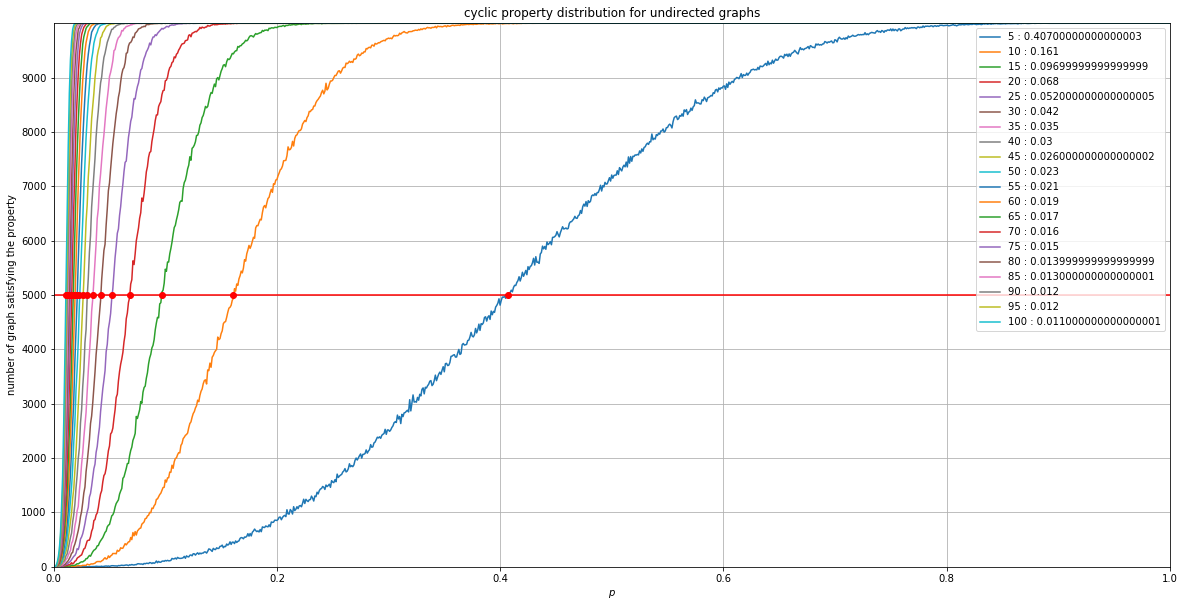

In [4]:
plot_curve(
    df,
    nb_samples,
    '%s property distribution for %s graphs' % (prop,direction)
)

In [5]:
print_best_p(df,nb_samples,max_degree=16)

Best p for 5 vertices : 0.405613, regression error : 29.393154
Best p for 10 vertices : 0.161271, regression error : 17.340926
Best p for 15 vertices : 0.096465, regression error : 37.236036
Best p for 20 vertices : 0.067702, regression error : 58.365844
Best p for 25 vertices : 0.051337, regression error : 124.956074
Best p for 30 vertices : 0.040654, regression error : 141.602231
Best p for 35 vertices : 0.034057, regression error : 141.311754
Best p for 40 vertices : 0.029578, regression error : 165.354304
Best p for 45 vertices : 0.026015, regression error : 203.559229
Best p for 50 vertices : 0.022896, regression error : 236.893819
Best p for 55 vertices : 0.020236, regression error : 259.521312
Best p for 60 vertices : 0.017919, regression error : 273.473965
Best p for 65 vertices : 0.015997, regression error : 281.074119
Best p for 70 vertices : 0.014352, regression error : 280.161690
Best p for 75 vertices : 0.013070, regression error : 277.720100
Best p for 80 vertices : 0.012

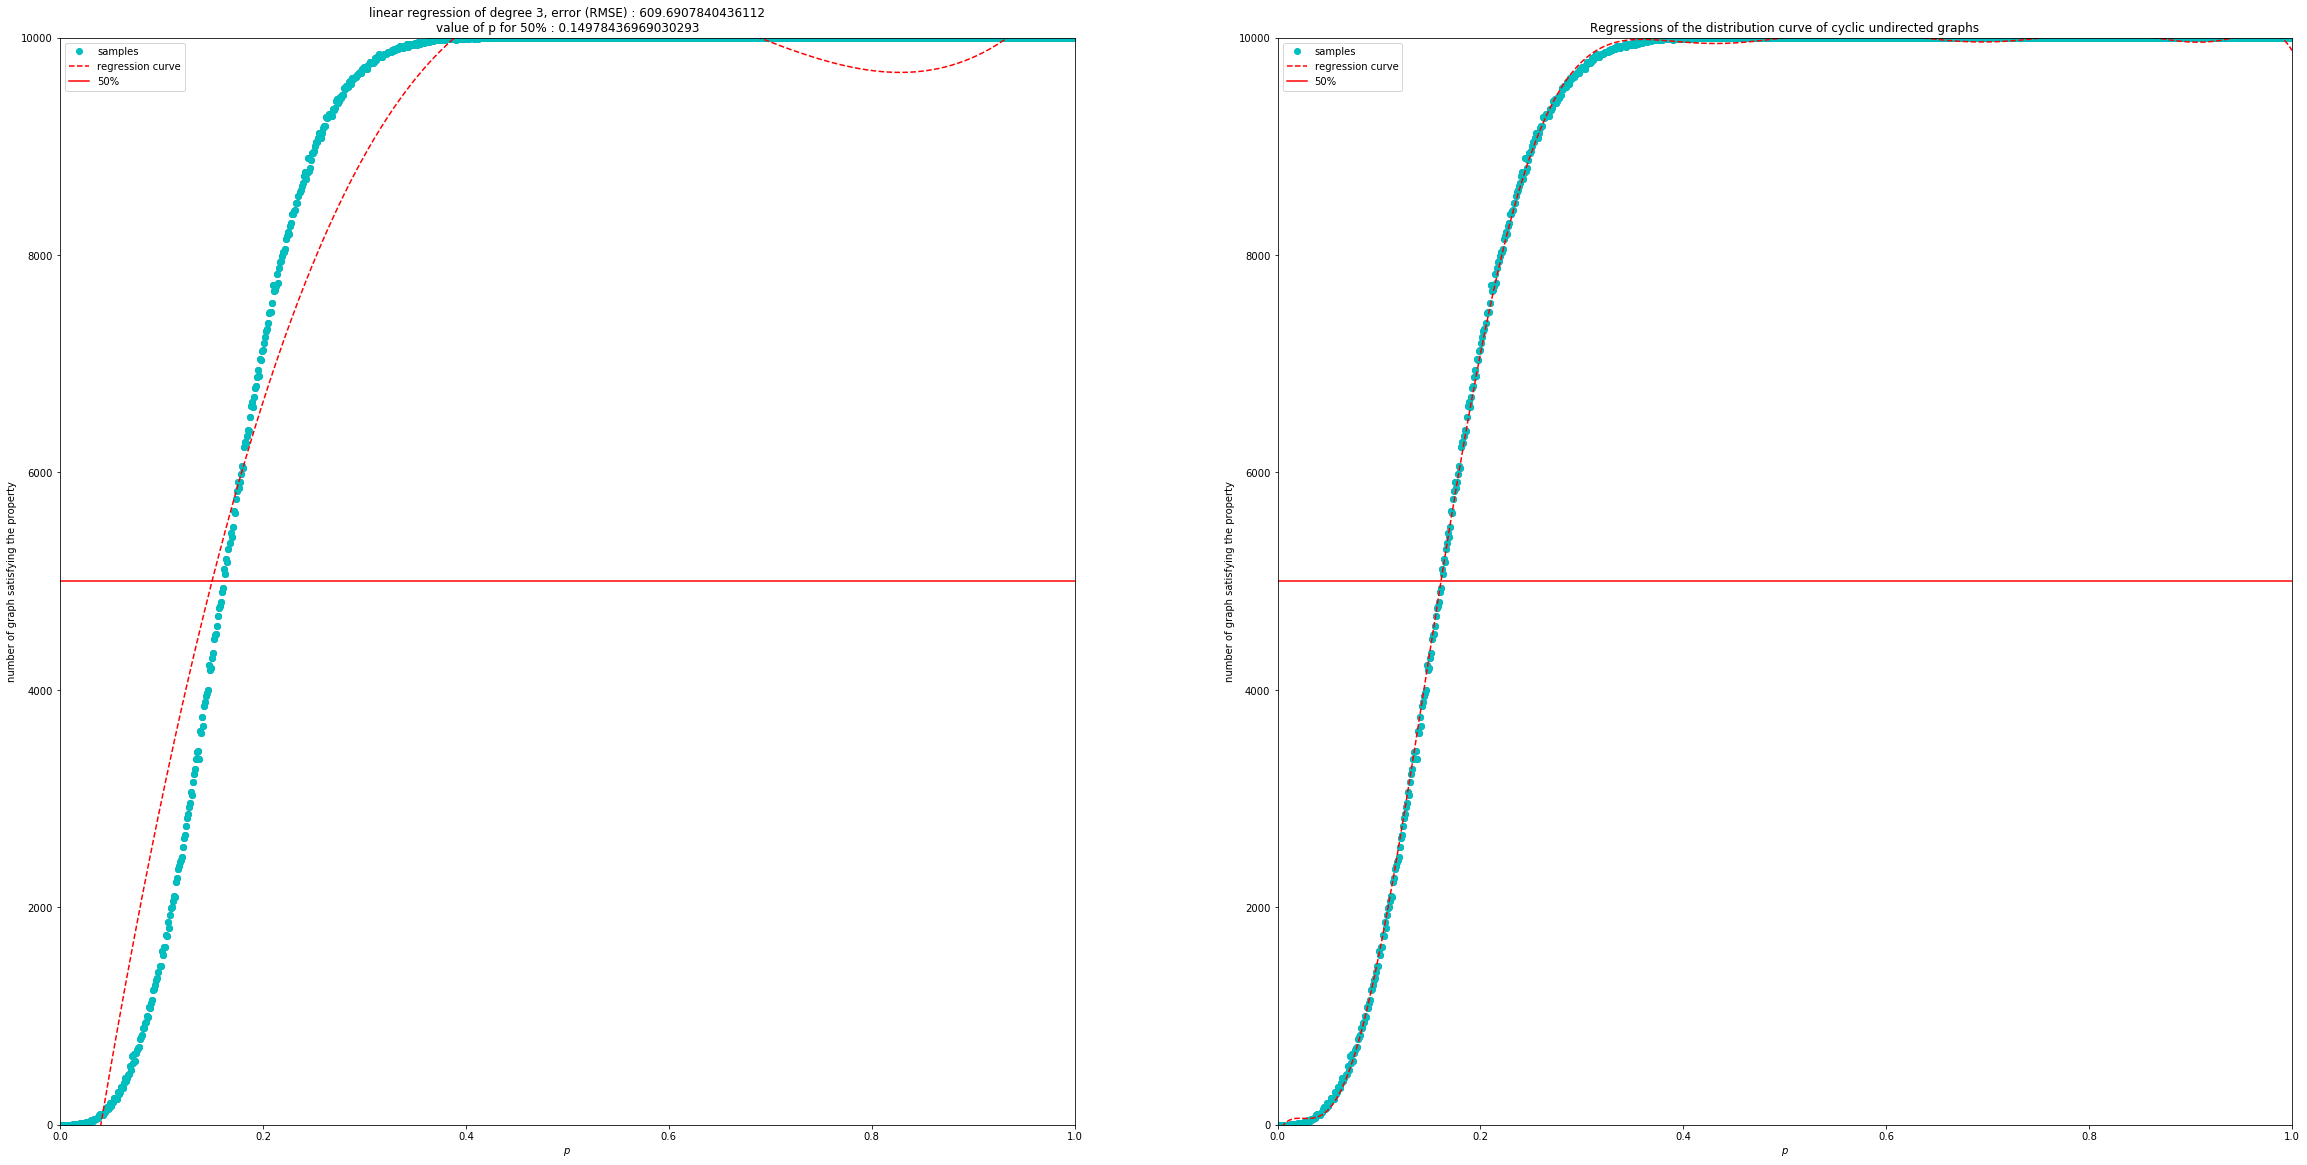

In [6]:
plot_regressions(df,'10',nb_samples,'Regressions of the distribution curve of %s %s graphs' % (prop,direction),
                 min_degree=3,
                 max_degree=10,
                 step_degree=7,
                 subplot=(1,2),
                 savefile="./poly_interpolation_order_10_%s_%s.pdf" % (prop,direction)
                )

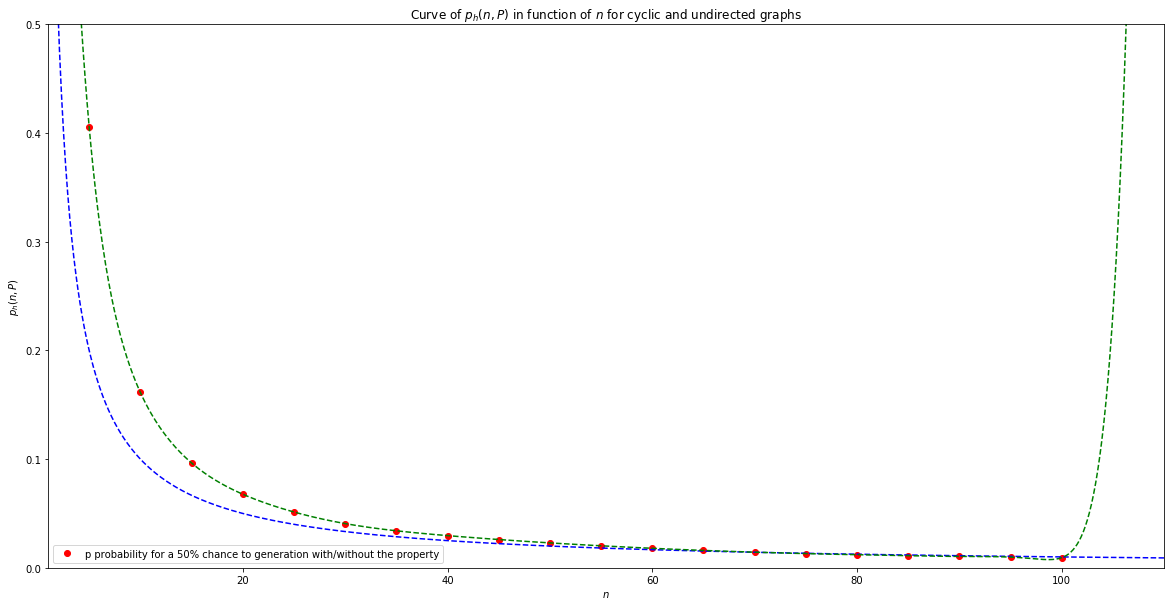

In [7]:
best_ps = compute_best_p(df,nb_samples,16)
x = np.array(list(map(lambda x : float(x[0]), list(best_ps.items()))))
y = np.array(list(map(lambda x : x[1][1][3],list(best_ps.items()))))

m = df.shape[0]
fit = np.polyfit(x,y,16)
fit_fn = np.poly1d(fit)
y_pred = fit_fn(x)
mse = np.sum((y_pred - y) ** 2)
rmse = np.sqrt(mse / m)

plt.figure(figsize=(20,10))
plt.xlim((1,110))
plt.ylim((0.0,0.5))

# plot regression points from sample
plt.plot(x,y,'ro')

# plot ln(x)/x
t = np.arange(1., 200., 0.1)
plt.plot(t,1.0 / t,'--b')

# plot regression curve
t = np.arange(1.,200.,0.1)
plt.plot(t,fit_fn(t),'--g')

plt.legend(['p probability for a 50% chance to generation with/without the property'])
plt.title('Curve of $p_h(n,P)$ in function of $n$ for %s and %s graphs' % (prop,direction))
plt.ylabel('$p_h(n,P)$')
plt.xlabel('$n$')
plt.savefig('./phnp_%s_%s.pdf' % (prop,direction),bbox_inches = 'tight')
plt.show()

In [8]:
print(type(fit_fn.coefficients))
print(fit_fn.coefficients)

acc = "List("
for itr in range(len(fit_fn.coefficients) - 1) :
    acc = acc + str(fit_fn.coefficients[itr]) + ","
acc = acc + str(fit_fn.coefficients[len(fit_fn.coefficients) - 1])
acc = acc + ")"
print(acc)

acc = "poly = ["
for itr in range(len(fit_fn.coefficients) - 1) :
    acc = acc + '"' + str(fit_fn.coefficients[itr]) + '"' + ","
    if(itr % 4 == 3):
        acc = acc + "\n"
acc = acc + '"' + str(fit_fn.coefficients[len(fit_fn.coefficients) - 1]) + '"'
acc = acc + "]"
print(acc)

<class 'numpy.ndarray'>
[ 8.70519546e-27 -7.55338279e-24  3.00905718e-21 -7.29471766e-19
  1.20252698e-16 -1.42676699e-14  1.25782691e-12 -8.38677314e-11
  4.26468690e-09 -1.65568412e-07  4.88189194e-06 -1.08057285e-04
  1.76139147e-03 -2.05313912e-02  1.63396277e-01 -8.18861262e-01
  2.15338754e+00]
List(8.70519545625875e-27,-7.553382790753962e-24,3.0090571761631647e-21,-7.294717663450571e-19,1.2025269818690134e-16,-1.4267669859234602e-14,1.2578269102832191e-12,-8.386773139944402e-11,4.264686900426967e-09,-1.6556841174784028e-07,4.8818919366530135e-06,-0.00010805728484558233,0.0017613914739258011,-0.020531391196496294,0.16339627713383512,-0.8188612623372984,2.153387537574705)
poly = ["8.70519545625875e-27","-7.553382790753962e-24","3.0090571761631647e-21","-7.294717663450571e-19",
"1.2025269818690134e-16","-1.4267669859234602e-14","1.2578269102832191e-12","-8.386773139944402e-11",
"4.264686900426967e-09","-1.6556841174784028e-07","4.8818919366530135e-06","-0.00010805728484558233",
"0.